In [1]:
import sys
sys.path.append('../')

from ipywidgets import RadioButtons, FloatSlider

In [2]:
from controller import DoNothing
from control.pure_pursuit import PurePursuit
from control.PID import PID 
from vehicle import Vehicle
from track import Track
from simulation import Simulation, show_img

vehicle = Vehicle(x=0, y=0, velocity=0, heading=0, wheel_base=2.6)
track = Track() 
handle_controller = DoNothing
pedal_controller = DoNothing

In [3]:
hanctl = RadioButtons(options=['PID', 'PurePursuit'],
                   value = 'PurePursuit',   
                   description='', disabled=False)
pedctl = RadioButtons(options=['なし（速度一定）', 'PID'],
                   value = 'PID',   
                   description='', disabled=False)

print("軌道追従アルゴリズムを選択")
display(hanctl)
print("速度制御アルゴリズムを選択")
display(pedctl)

軌道追従アルゴリズムを選択


RadioButtons(index=1, options=('PID', 'PurePursuit'), value='PurePursuit')

速度制御アルゴリズムを選択


RadioButtons(index=1, options=('なし（速度一定）', 'PID'), value='PID')

In [4]:
if hanctl.value == 'PID':
        print("軌道追従アルゴリズム(PID)のパラメータを設定")
        h_Kp = FloatSlider(value=3, min=0, max=10.0, step=0.1, description='Kp=', readout_format='.1f',)
        h_Ki = FloatSlider(value=0, min=0, max=10.0, step=0.1, description='Ki=', readout_format='.1f',)
        h_Kd = FloatSlider(value=0, min=0, max=10.0, step=0.1, description='Kd=', readout_format='.1f',)
        display(h_Kp)
        display(h_Ki)
        display(h_Kd)
elif hanctl.value == 'PurePursuit':
        print("軌道追従アルゴリズム(PurePursuit)のパラメータを設定")
        Kdd = FloatSlider(value=0.4, min=0, max=3.0, step=0.1, description='Kdd=', readout_format='.1f',)
        display(Kdd)

軌道追従アルゴリズム(PurePursuit)のパラメータを設定


FloatSlider(value=0.4, description='Kdd=', max=3.0, readout_format='.1f')

In [5]:

print("目標速度を設定")
desired_velocity = FloatSlider(value=25, min=0, max=30.0, step=0.1, description='目標速度=', readout_format='.1f',)
display(desired_velocity)

if pedctl.value == 'なし（速度一定）':
    print()
elif pedctl.value == 'PID':
    print("速度制御アルゴリズム(PID)のパラメータを設定")
    p_Kp = FloatSlider(value=3, min=0, max=10.0, step=0.1, description='Kp=', readout_format='.1f',)
    p_Ki = FloatSlider(value=0, min=0, max=10.0, step=0.1, description='Ki=', readout_format='.1f',)
    p_Kd = FloatSlider(value=0, min=0, max=10.0, step=0.1, description='Kd=', readout_format='.1f',)
    display(p_Kp)
    display(p_Ki)
    display(p_Kd)

目標速度を設定


FloatSlider(value=25.0, description='目標速度=', max=30.0, readout_format='.1f')

速度制御アルゴリズム(PID)のパラメータを設定


FloatSlider(value=3.0, description='Kp=', max=10.0, readout_format='.1f')

FloatSlider(value=0.0, description='Ki=', max=10.0, readout_format='.1f')

FloatSlider(value=0.0, description='Kd=', max=10.0, readout_format='.1f')

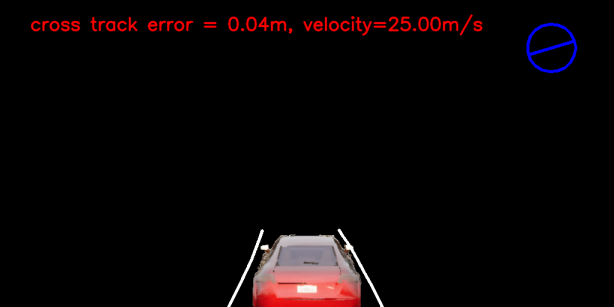

In [6]:
from IPython.display import clear_output

if hanctl.value == 'PID':
    handle_controller = PID(PID(Kp=h_Kp.value, Ki=h_Ki.value, Kd=h_Kd.value, set_point=0))
elif hanctl.value == 'PurePursuit':
    handle_controller = PurePursuit(Kdd=Kdd.value)

if pedctl.value == 'なし（速度一定）':
    vehicle.velocity = desired_velocity.value
elif pedctl.value == 'PID':
    pedal_controller = PID(Kp=p_Kp.value, Ki=p_Ki.value, Kd=p_Kd.value, set_point=desired_velocity.value)

sim = Simulation(vehicle, track, handle_controller, pedal_controller)

img_list = []
for i in range(1, 1000):
    try:
        sim.step()
        # visualization
        img = sim.cv_plot()
        if i%2==0:
            img_list.append(img)
            show_img(img)
        clear_output(wait=True)
        # check for simulation end
        if len(sim.waypoints) < 10:
            break

    except KeyboardInterrupt:
        break

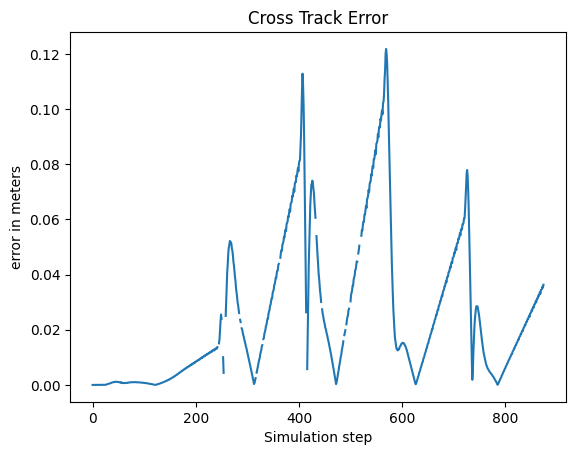

In [8]:
sim.plot_error()

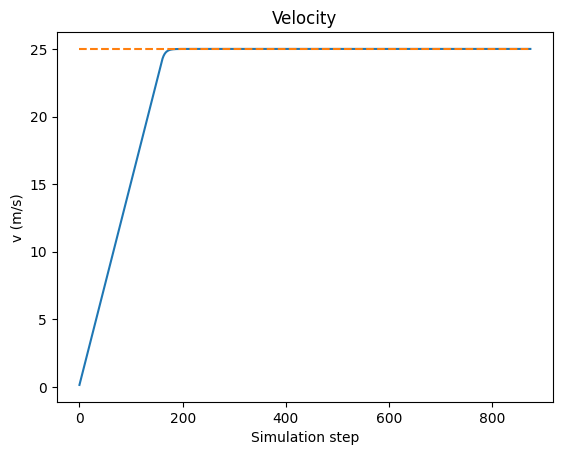

In [9]:
sim.plot_velocity()

In [11]:
import imageio
imageio.mimsave('control.gif', img_list, fps=20)

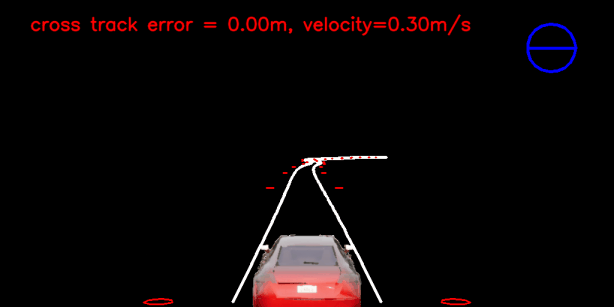

In [12]:
from IPython.display import Image
Image(open('control.gif','rb').read())